In [1]:
import findspark
findspark.init()

In [2]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [3]:
spark= SparkSession.builder.master("local").appName("mycode").getOrCreate()
spark

In [4]:
import databricks.koalas as ks
import pyspark.pandas as pd

In [6]:
df = ks.read_json("file:///C:/Users/Krishna/data/people.json")

In [7]:
type(df)

databricks.koalas.frame.DataFrame

In [8]:
df.spark.print_schema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)
 |-- pcode: string (nullable = true)



In [9]:
df

,age,name,pcode
0,NaN,Alice,94304
1,30.0,Brayden,94304
2,19.0,Carla,10036
3,46.0,Diana,None
4,NaN,Etienne,94104


In [16]:
df.age>30

0    False
1    False
2    False
3     True
4    False
Name: age, dtype: bool

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

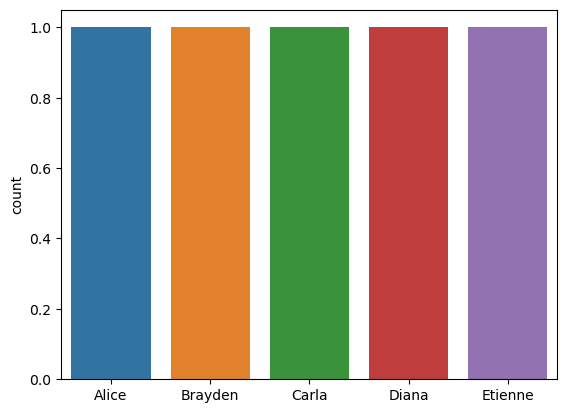

In [18]:
sns.countplot(df['name'].to_numpy())

In [23]:
import pyspark.pandas as ps
psdf = ps.read_csv("file:///C:/Users/Krishna/data/latlon.tsv",sep='\t') # This is a pandas-on-Spark DataFrame
pdf = psdf.to_pandas()          # Convert to actual Pandas DataFrame


1. DataFrame Creation
Koalas Method (pandas-on-Spark)	PySpark Equivalent
ps.read_csv()	spark.read.csv()
ps.read_parquet()	spark.read.parquet()
ps.from_pandas()	spark.createDataFrame()
ps.range()	spark.range()

2. DataFrame Operations
Koalas / pandas-on-Spark	PySpark
df.head()	df.limit(n).collect()
df.tail()	Reverses and collects
df.sample()	df.sample()
df.dropna()	df.na.drop()
df.fillna()	df.na.fill()
df.astype()	df.withColumn(...cast())
df.select_dtypes()	Not directly in PySpark
df.drop()	df.drop()

In [ ]:
2. DataFrame Operations
Koalas / pandas-on-Spark	PySpark
df.head()	df.limit(n).collect()
df.tail()	Reverses and collects
df.sample()	df.sample()
df.dropna()	df.na.drop()
df.fillna()	df.na.fill()
df.astype()	df.withColumn(...cast())
df.select_dtypes()	Not directly in PySpark
df.drop()	df.drop()
df.rename()	df.withColumnRenamed()


3. Aggregation / Grouping
Koalas / pandas-on-Spark	PySpark
df.groupby(...).sum()	df.groupBy().sum()
df.groupby(...).mean()	df.groupBy().avg()
df.groupby(...).agg()	df.groupBy().agg()
df.rolling()	Implemented via window functions
df.expanding()	Approximate using cumulative logic
df.cumsum()	Window + sum()
df.cummax()	Custom with Window

Joining / Merging
Koalas / pandas-on-Spark	PySpark
df.merge()	df.join()
df.join()	df.join()
df.append()	df.union()
df.concat()	df.union() or DataFrame.unionByName()

 6. Sorting / Filtering
Koalas / pandas-on-Spark	PySpark
df.sort_values()	df.orderBy()
df.query()	Converted to filter condition
df[df.col > 10]	df.filter(df.col > 10)

🔹 7. String & Date Operations
Koalas / pandas-on-Spark	PySpark
df.str.lower()	F.lower(df.col)
df.str.contains()	df.col.contains()
df.dt.year	F.year(df.col)
df.dt.month	F.month(df.col)

🔹 8. Conversion
Koalas / pandas-on-Spark	PySpark
df.to_pandas()	df.toPandas()
df.to_spark()	Converts to PySpark DataFrame
ps.from_pandas()	spark.createDataFrame()
df.to_numpy()	toPandas().to_numpy()

🔹 9. Plotting
Koalas supports df.plot() using Matplotlib (after converting to Pandas under the hood).

Not available in PySpark directly.

🔹 10. Misc
Koalas / pandas-on-Spark	PySpark
df.describe()	df.describe()
df.info()	Emulated (not native in PySpark)
df.memory_usage()	Not directly supported in PySpark

✅ Summary
Koalas (pandas-on-Spark) is essentially a wrapper layer over PySpark. Internally:

Operations are translated into PySpark DataFrame transformations and actions

Indexes are simulated, not natively present in PySpark

Much of Pandas-style syntax is made available using PySpark under the hood